In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import sklearn_relief as relief
from sklearn.metrics import accuracy_score

In [2]:
df = pd.read_csv(r'cyber121.csv')

In [3]:
df.head()

,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,...,Firewall,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSInstallLanguageIdentifier,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,98503,173902,53447,102888,37194,8192,17134,17134,2543,165,...,768,628,75,31,137,8,1,27,12.5,0
1,1400,456924,53447,186069,64721,2048,16299,16299,2042,492,...,768,127,227,34,117,9,10,27,11.6,0
2,44488,29144,53447,317708,12536,2048,10586,10586,1848,1176,...,1080,142,233,31,74,8,15,18,23.0,0
3,129332,121027,53447,313374,38396,16384,17134,17134,3125,191,...,1080,142,223,34,137,9,10,27,17.2,0
4,18964,474552,43927,126133,39065,4096,17134,17134,3427,165,...,768,628,210,128,137,30,3,27,15.5,0


In [4]:
df.shape

(702545, 26)

In [5]:
df.isnull().sum()

IsBeta                                               0
RtpStateBitfield                                     0
IsSxsPassiveMode                                     0
DefaultBrowsersIdentifier                            0
AVProductStatesIdentifier                            0
AVProductsInstalled                                  0
HasTpm                                               0
CountryIdentifier                                    0
CityIdentifier                                       0
OrganizationIdentifier                               0
GeoNameIdentifier                                    0
LocaleEnglishNameIdentifier                          0
OsBuild                                              0
OsSuite                                              0
IsProtected                                          0
SMode                                                0
Firewall                                             0
Census_InternalPrimaryDiagonalDisplaySizeInInches    0
Census_Int

In [6]:
from imblearn.over_sampling import SMOTE

In [7]:
x = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [8]:
# oversample = SMOTE(random_state=20)
# a, b = oversample.fit_resample(x, y)

In [42]:
X_train,X_test,y_train,y_test=train_test_split(x, y, test_size=0.30, random_state=42)

In [43]:
from sklearn.ensemble import RandomForestClassifier
from mlxtend.evaluate import confusion_matrix
from sklearn.metrics import classification_report

In [111]:
rf = RandomForestClassifier(min_samples_leaf=2, random_state=10, ccp_alpha=0.4,n_estimators=100)
                           
rf.fit(X_train,y_train)

RandomForestClassifier(ccp_alpha=0.4, min_samples_leaf=2, random_state=10)

In [112]:
rfp = rf.predict(X_test)

In [113]:
rfa = accuracy_score(y_test,rfp)
mqer = confusion_matrix(y_test, rfp)
print(rfa)
print(mqer)

0.8188020724601924
[[172574      0]
 [ 38190      0]]


In [47]:
from sklearn.tree import DecisionTreeClassifier

In [115]:
dt = DecisionTreeClassifier(min_samples_leaf=2, ccp_alpha=0.19)
dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.19, min_samples_leaf=2)

In [116]:
dtp = dt.predict(X_test)

In [117]:
dta = accuracy_score(y_test,dtp)
dtcm = confusion_matrix(y_test, dtp)
print(dta)
print(dtcm)

0.9999572982103205
[[172571      3]
 [     6  38184]]


In [77]:
print(classification_report(y_test,dtp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172574
           1       1.00      1.00      1.00     38190

    accuracy                           1.00    210764
   macro avg       1.00      1.00      1.00    210764
weighted avg       1.00      1.00      1.00    210764



In [78]:
from sklearn.ensemble import GradientBoostingClassifier

In [83]:
gb = GradientBoostingClassifier(min_samples_leaf=2, random_state=0, ccp_alpha=0.7)
gb.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.7, min_samples_leaf=2, random_state=0)

In [84]:
gbp = gb.predict(X_test)

In [85]:
%%time
gba = accuracy_score(y_test,gbp)
gbcm = confusion_matrix(y_test, gbp)
print(gba)
print(gbcm)

0.8188020724601924
[[172574      0]
 [ 38190      0]]
Wall time: 123 ms


In [23]:
print(classification_report(y_test,gbp))

              precision    recall  f1-score   support

           0       0.82      1.00      0.90    172530
           1       0.00      0.00      0.00     38234

    accuracy                           0.82    210764
   macro avg       0.41      0.50      0.45    210764
weighted avg       0.67      0.82      0.74    210764



c:\program files\python36\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
lr = LogisticRegression(random_state=15)
lr.fit(X_train,y_train)

c:\program files\python36\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(random_state=15)

In [26]:
lrp = lr.predict(X_test)

In [27]:
lra = accuracy_score(y_test,lrp)
lrcm = confusion_matrix(y_test, lrp)
print(lra)
print(lrcm)

0.9927881421874704
[[171842    688]
 [   832  37402]]


In [28]:
print(classification_report(y_test,lrp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172530
           1       0.98      0.98      0.98     38234

    accuracy                           0.99    210764
   macro avg       0.99      0.99      0.99    210764
weighted avg       0.99      0.99      0.99    210764



In [29]:
from catboost import CatBoostClassifier

In [30]:
cb = CatBoostClassifier(depth=5,random_state=15,min_data_in_leaf=50)
cb.fit(X_train[:155000],y_train[:155000])

Learning rate set to 0.088758
0:	learn: 0.4241607	total: 168ms	remaining: 2m 47s
1:	learn: 0.2233055	total: 192ms	remaining: 1m 35s
2:	learn: 0.1379125	total: 217ms	remaining: 1m 12s
3:	learn: 0.0885909	total: 238ms	remaining: 59.2s
4:	learn: 0.0507976	total: 267ms	remaining: 53.2s
5:	learn: 0.0351368	total: 293ms	remaining: 48.6s
6:	learn: 0.0254027	total: 318ms	remaining: 45.2s
7:	learn: 0.0153743	total: 358ms	remaining: 44.4s
8:	learn: 0.0099317	total: 387ms	remaining: 42.6s
9:	learn: 0.0068289	total: 419ms	remaining: 41.5s
10:	learn: 0.0050197	total: 451ms	remaining: 40.5s
11:	learn: 0.0038726	total: 477ms	remaining: 39.3s
12:	learn: 0.0031514	total: 500ms	remaining: 37.9s
13:	learn: 0.0027265	total: 522ms	remaining: 36.7s
14:	learn: 0.0024402	total: 542ms	remaining: 35.6s
15:	learn: 0.0022249	total: 565ms	remaining: 34.8s
16:	learn: 0.0020906	total: 587ms	remaining: 33.9s
17:	learn: 0.0019883	total: 603ms	remaining: 32.9s
18:	learn: 0.0019255	total: 622ms	remaining: 32.1s
19:	lear

164:	learn: 0.0011139	total: 3.32s	remaining: 16.8s
165:	learn: 0.0011139	total: 3.34s	remaining: 16.8s
166:	learn: 0.0011139	total: 3.35s	remaining: 16.7s
167:	learn: 0.0011139	total: 3.37s	remaining: 16.7s
168:	learn: 0.0011139	total: 3.38s	remaining: 16.6s
169:	learn: 0.0011139	total: 3.39s	remaining: 16.6s
170:	learn: 0.0011139	total: 3.41s	remaining: 16.5s
171:	learn: 0.0011139	total: 3.42s	remaining: 16.5s
172:	learn: 0.0011139	total: 3.44s	remaining: 16.4s
173:	learn: 0.0011138	total: 3.45s	remaining: 16.4s
174:	learn: 0.0011138	total: 3.46s	remaining: 16.3s
175:	learn: 0.0011138	total: 3.48s	remaining: 16.3s
176:	learn: 0.0011138	total: 3.49s	remaining: 16.2s
177:	learn: 0.0011138	total: 3.51s	remaining: 16.2s
178:	learn: 0.0011138	total: 3.54s	remaining: 16.2s
179:	learn: 0.0011138	total: 3.56s	remaining: 16.2s
180:	learn: 0.0011138	total: 3.58s	remaining: 16.2s
181:	learn: 0.0011138	total: 3.6s	remaining: 16.2s
182:	learn: 0.0011138	total: 3.61s	remaining: 16.1s
183:	learn: 0

331:	learn: 0.0011025	total: 5.95s	remaining: 12s
332:	learn: 0.0011025	total: 5.97s	remaining: 11.9s
333:	learn: 0.0011025	total: 5.99s	remaining: 11.9s
334:	learn: 0.0011025	total: 6s	remaining: 11.9s
335:	learn: 0.0011025	total: 6.02s	remaining: 11.9s
336:	learn: 0.0011025	total: 6.04s	remaining: 11.9s
337:	learn: 0.0011025	total: 6.05s	remaining: 11.8s
338:	learn: 0.0011025	total: 6.07s	remaining: 11.8s
339:	learn: 0.0011025	total: 6.08s	remaining: 11.8s
340:	learn: 0.0011025	total: 6.1s	remaining: 11.8s
341:	learn: 0.0011025	total: 6.11s	remaining: 11.8s
342:	learn: 0.0011024	total: 6.13s	remaining: 11.7s
343:	learn: 0.0011024	total: 6.15s	remaining: 11.7s
344:	learn: 0.0011025	total: 6.16s	remaining: 11.7s
345:	learn: 0.0011024	total: 6.18s	remaining: 11.7s
346:	learn: 0.0011024	total: 6.2s	remaining: 11.7s
347:	learn: 0.0011024	total: 6.21s	remaining: 11.6s
348:	learn: 0.0011024	total: 6.23s	remaining: 11.6s
349:	learn: 0.0011024	total: 6.24s	remaining: 11.6s
350:	learn: 0.00110

490:	learn: 0.0010285	total: 8.44s	remaining: 8.75s
491:	learn: 0.0010285	total: 8.46s	remaining: 8.73s
492:	learn: 0.0010285	total: 8.47s	remaining: 8.71s
493:	learn: 0.0010285	total: 8.49s	remaining: 8.7s
494:	learn: 0.0010285	total: 8.51s	remaining: 8.68s
495:	learn: 0.0010285	total: 8.52s	remaining: 8.66s
496:	learn: 0.0010285	total: 8.54s	remaining: 8.64s
497:	learn: 0.0010285	total: 8.55s	remaining: 8.62s
498:	learn: 0.0010285	total: 8.56s	remaining: 8.6s
499:	learn: 0.0010285	total: 8.58s	remaining: 8.58s
500:	learn: 0.0010285	total: 8.6s	remaining: 8.56s
501:	learn: 0.0010285	total: 8.61s	remaining: 8.55s
502:	learn: 0.0010285	total: 8.63s	remaining: 8.53s
503:	learn: 0.0010285	total: 8.65s	remaining: 8.51s
504:	learn: 0.0010285	total: 8.66s	remaining: 8.49s
505:	learn: 0.0010285	total: 8.68s	remaining: 8.47s
506:	learn: 0.0010285	total: 8.69s	remaining: 8.45s
507:	learn: 0.0010285	total: 8.71s	remaining: 8.44s
508:	learn: 0.0010285	total: 8.72s	remaining: 8.42s
509:	learn: 0.0

656:	learn: 0.0010283	total: 11.2s	remaining: 5.83s
657:	learn: 0.0010283	total: 11.2s	remaining: 5.82s
658:	learn: 0.0010283	total: 11.2s	remaining: 5.8s
659:	learn: 0.0010283	total: 11.2s	remaining: 5.78s
660:	learn: 0.0010283	total: 11.2s	remaining: 5.76s
661:	learn: 0.0010283	total: 11.3s	remaining: 5.75s
662:	learn: 0.0010283	total: 11.3s	remaining: 5.73s
663:	learn: 0.0010283	total: 11.3s	remaining: 5.71s
664:	learn: 0.0010283	total: 11.3s	remaining: 5.69s
665:	learn: 0.0010283	total: 11.3s	remaining: 5.67s
666:	learn: 0.0010283	total: 11.3s	remaining: 5.66s
667:	learn: 0.0010283	total: 11.3s	remaining: 5.64s
668:	learn: 0.0010283	total: 11.4s	remaining: 5.62s
669:	learn: 0.0010283	total: 11.4s	remaining: 5.6s
670:	learn: 0.0010283	total: 11.4s	remaining: 5.59s
671:	learn: 0.0010283	total: 11.4s	remaining: 5.57s
672:	learn: 0.0010283	total: 11.4s	remaining: 5.55s
673:	learn: 0.0010283	total: 11.4s	remaining: 5.53s
674:	learn: 0.0010283	total: 11.5s	remaining: 5.52s
675:	learn: 0.

818:	learn: 0.0010280	total: 13.7s	remaining: 3.03s
819:	learn: 0.0010280	total: 13.7s	remaining: 3.01s
820:	learn: 0.0010280	total: 13.7s	remaining: 2.99s
821:	learn: 0.0010280	total: 13.7s	remaining: 2.97s
822:	learn: 0.0010280	total: 13.8s	remaining: 2.96s
823:	learn: 0.0010280	total: 13.8s	remaining: 2.94s
824:	learn: 0.0010280	total: 13.8s	remaining: 2.92s
825:	learn: 0.0010280	total: 13.8s	remaining: 2.91s
826:	learn: 0.0010280	total: 13.8s	remaining: 2.89s
827:	learn: 0.0010280	total: 13.8s	remaining: 2.87s
828:	learn: 0.0010280	total: 13.8s	remaining: 2.85s
829:	learn: 0.0010280	total: 13.9s	remaining: 2.84s
830:	learn: 0.0010272	total: 13.9s	remaining: 2.82s
831:	learn: 0.0010213	total: 13.9s	remaining: 2.8s
832:	learn: 0.0010213	total: 13.9s	remaining: 2.79s
833:	learn: 0.0010213	total: 13.9s	remaining: 2.77s
834:	learn: 0.0010213	total: 13.9s	remaining: 2.75s
835:	learn: 0.0010213	total: 14s	remaining: 2.74s
836:	learn: 0.0010213	total: 14s	remaining: 2.72s
837:	learn: 0.001

981:	learn: 0.0010210	total: 16.2s	remaining: 298ms
982:	learn: 0.0010210	total: 16.3s	remaining: 281ms
983:	learn: 0.0010210	total: 16.3s	remaining: 265ms
984:	learn: 0.0010210	total: 16.3s	remaining: 248ms
985:	learn: 0.0010210	total: 16.3s	remaining: 232ms
986:	learn: 0.0010210	total: 16.3s	remaining: 215ms
987:	learn: 0.0010210	total: 16.3s	remaining: 198ms
988:	learn: 0.0010210	total: 16.4s	remaining: 182ms
989:	learn: 0.0010210	total: 16.4s	remaining: 165ms
990:	learn: 0.0010210	total: 16.4s	remaining: 149ms
991:	learn: 0.0010210	total: 16.4s	remaining: 132ms
992:	learn: 0.0010210	total: 16.4s	remaining: 116ms
993:	learn: 0.0010210	total: 16.4s	remaining: 99.2ms
994:	learn: 0.0010210	total: 16.5s	remaining: 82.7ms
995:	learn: 0.0010210	total: 16.5s	remaining: 66.1ms
996:	learn: 0.0010210	total: 16.5s	remaining: 49.6ms
997:	learn: 0.0010210	total: 16.5s	remaining: 33.1ms
998:	learn: 0.0010210	total: 16.5s	remaining: 16.5ms
999:	learn: 0.0010210	total: 16.5s	remaining: 0us


In [31]:
cbp = cb.predict(X_test)

In [32]:
cba = accuracy_score(y_test,cbp)
cbcm = confusion_matrix(y_test, cbp)
print(cba)
print(cbcm)

0.9993642177981059
[[172501     29]
 [   105  38129]]


In [33]:
print(classification_report(y_test,cbp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172530
           1       1.00      1.00      1.00     38234

    accuracy                           1.00    210764
   macro avg       1.00      1.00      1.00    210764
weighted avg       1.00      1.00      1.00    210764



In [34]:
from sklearn.svm import SVC

In [ ]:
sv = SVC(random_state=10,gamma=0.5)
sv.fit(X_train[:780000],y_train[:780000])

In [ ]:
svp= sv.predict(X_test)

In [ ]:
%%time
sva = accuracy_score(y_test,svp)
svcm = confusion_matrix(y_test, svp)
print(sva)
print(svcm)

In [102]:
print(classification_report(y_test,svp))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    172574
           1       1.00      1.00      1.00     38190

    accuracy                           1.00    210764
   macro avg       1.00      1.00      1.00    210764
weighted avg       1.00      1.00      1.00    210764



In [103]:
graph = pd.DataFrame({'Models':['DecisionTree','Random Forest','GradientBoostingClassifier','LogisticRegression','Cat Boost','SVM'],'Accuracy':[dta*100,rfa*100,gba*100,lra*100,cba*100,sva*100]})
graph

,Models,Accuracy
0,DecisionTree,99.995730
1,Random Forest,81.880207
2,GradientBoostingClassifier,81.880207
3,LogisticRegression,99.278814
4,Cat Boost,99.936422
5,SVM,99.974853


In [104]:
import matplotlib.pyplot as plt
import seaborn as sns

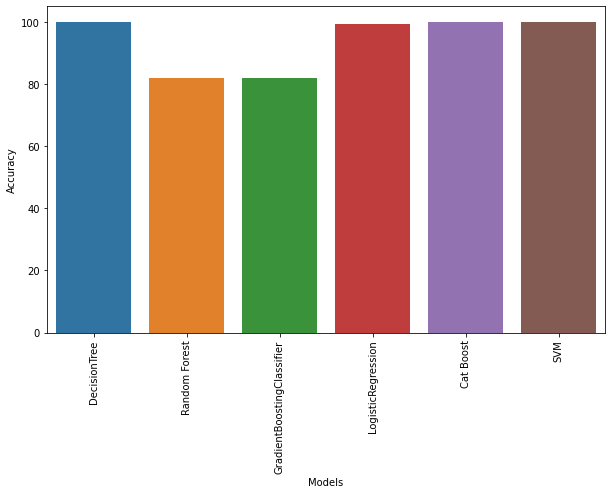

In [105]:
plt.figure(figsize = (10,6))
sns.barplot(y = graph.Accuracy,x = graph.Models)
plt.xticks(rotation = 'vertical')
plt.show()